In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt




In [81]:
ticker = "NVDA"  # US-listed NVIDIA
data = yf.download(ticker, period="3mo", interval="1d")

/var/folders/3n/c2cyvjmd52585bcd83mjw9dw0000gp/T/ipykernel_50394/1225871410.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="3mo", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [82]:
data["MA_22"] = data["Close"].rolling(window=22).mean()
print(data)


Price            Close        High         Low        Open     Volume  \
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA   
Date                                                                    
2025-04-28  108.722450  110.362336  106.012632  109.682383  207708500   
2025-04-29  109.012428  110.192347  107.432544  107.662524  170444300   
2025-04-30  108.912437  108.912437  104.072777  104.462749  235044600   
2025-05-01  111.602249  114.932020  111.292273  113.072148  236121500   
2025-05-02  114.492050  115.391989  113.362131  114.172073  190194800   
...                ...         ...         ...         ...        ...   
2025-07-21  171.380005  173.380005  171.000000  172.750000  123126100   
2025-07-22  167.029999  171.389999  164.580002  171.339996  193114300   
2025-07-23  170.779999  171.259995  167.970001  169.529999  154082200   
2025-07-24  173.740005  173.830002  171.300003  172.440002  128984600   
2025-07-25  173.500000  174.720001  172.960007  173

In [83]:

def get_sentiment(row):
    if pd.isna(row["MA_22"].iloc[0]):
        return None
    return "Bullish" if row["Close"].iloc[0] > row["MA_22"].iloc[0] else "Bearish"

data["Sentiment"] = data.apply(get_sentiment, axis=1)
latest_sentiment = data["Sentiment"].dropna().iloc[-1]
print(f"Latest market sentiment for {ticker}: {latest_sentiment}")




Latest market sentiment for NVDA: Bullish


In [84]:
print(data["MA_22"].dropna())

Date
2025-05-28    123.895942
2025-05-29    125.280392
2025-05-30    126.467128
2025-06-02    127.760675
2025-06-03    129.106490
2025-06-04    130.352767
2025-06-05    131.542230
2025-06-06    132.823050
2025-06-09    133.985242
2025-06-10    135.193795
2025-06-11    136.384163
2025-06-12    137.384551
2025-06-13    137.932234
2025-06-16    138.357662
2025-06-17    138.780360
2025-06-18    139.238969
2025-06-20    139.615761
2025-06-23    140.061185
2025-06-24    140.793419
2025-06-25    141.770201
2025-06-26    142.849252
2025-06-27    143.861044
2025-06-30    144.915106
2025-07-01    145.556908
2025-07-02    146.562789
2025-07-03    147.561404
2025-07-07    148.335487
2025-07-08    149.157753
2025-07-09    150.198649
2025-07-10    151.216370
2025-07-11    152.230001
2025-07-14    153.144547
2025-07-15    154.411364
2025-07-16    155.610001
2025-07-17    157.020455
2025-07-18    158.280455
2025-07-21    159.519547
2025-07-22    160.499092
2025-07-23    161.723183
2025-07-24    163.06

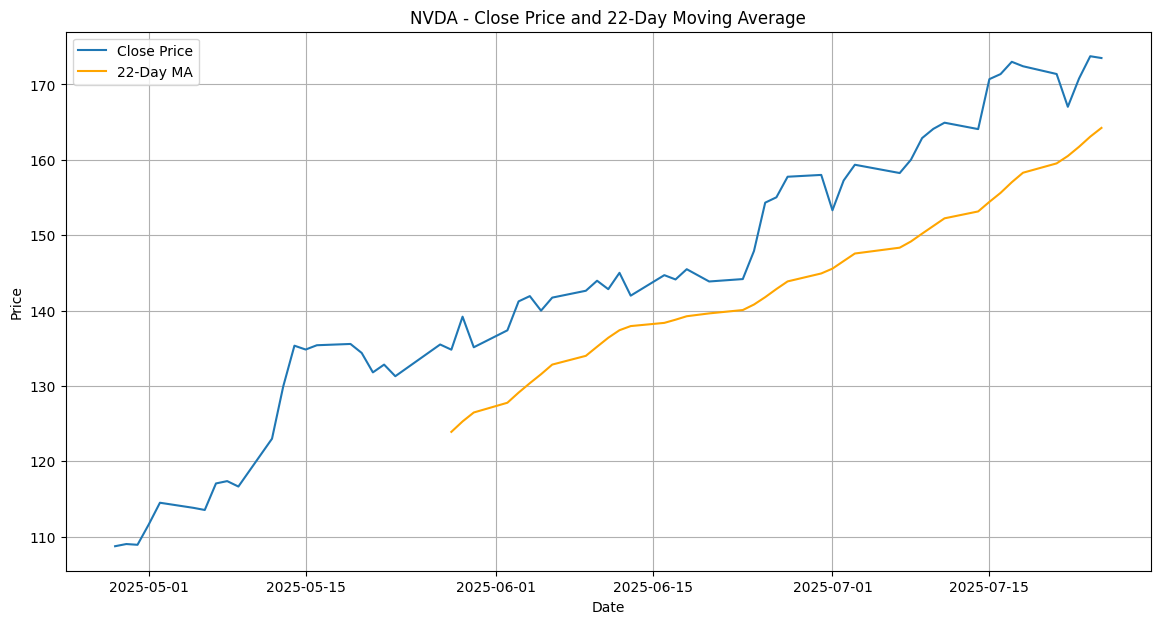

In [85]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data["Close"], label="Close Price")
plt.plot(data.index, data["MA_22"], label="22-Day MA", color="orange")
plt.title(f"{ticker} - Close Price and 22-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

In [70]:
print(data.columns)


MultiIndex([(    'Close', 'NVDA'),
            (     'High', 'NVDA'),
            (      'Low', 'NVDA'),
            (     'Open', 'NVDA'),
            (   'Volume', 'NVDA'),
            (    'MA_22',     ''),
            ('Sentiment',     '')],
           names=['Price', 'Ticker'])


In [87]:
data.to_csv("mafile.csv")